In [1]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm

In [7]:
# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [8]:
X[0]

array([6.320e-03, 1.800e+01, 2.310e+00, 0.000e+00, 5.380e-01, 6.575e+00,
       6.520e+01, 4.090e+00, 1.000e+00, 2.960e+02, 1.530e+01, 3.969e+02,
       4.980e+00])

In [3]:
print(X_train)
print(X_train.shape)

[[1.50234e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.49480e+02
  2.49100e+01]
 [6.27390e-01 0.00000e+00 8.14000e+00 ... 2.10000e+01 3.95620e+02
  8.47000e+00]
 [3.46600e-02 3.50000e+01 6.06000e+00 ... 1.69000e+01 3.62250e+02
  7.83000e+00]
 ...
 [1.50100e-02 8.00000e+01 2.01000e+00 ... 1.70000e+01 3.90940e+02
  5.99000e+00]
 [1.11604e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 1.09850e+02
  2.32700e+01]
 [2.28760e-01 0.00000e+00 8.56000e+00 ... 2.09000e+01 7.08000e+01
  1.06300e+01]]
(404, 13)


In [6]:
print(y_train)
print(y_train.shape)

[12.  19.9 19.4 13.4 18.2 24.6 21.1 24.7  8.7 27.5 20.7 36.2 31.6 11.7
 39.8 13.9 21.8 23.7 17.6 24.4  8.8 19.2 25.3 20.4 23.1 37.9 15.6 45.4
 15.7 22.6 14.5 18.7 17.8 16.1 20.6 31.6 29.1 15.6 17.5 22.5 19.4 19.3
  8.5 20.6 17.  17.1 14.5 50.  14.3 12.6 28.7 21.2 19.3 23.1 19.1 25.
 33.4  5.  29.6 18.7 21.7 23.1 22.8 21.  48.8 14.6 16.6 27.1 20.1 19.8
 21.  41.3 23.2 20.4 18.5 29.4 36.4 24.4 11.8 13.8 12.3 17.8 33.1 26.7
 13.4 14.4 50.  22.  19.9 23.8 17.5 12.7  5.6 31.1 26.2 19.4 16.7 13.8
 22.9 15.3 27.5 36.1 22.9 24.5 25.  50.  34.9 31.7 24.1 22.1 14.1 42.8
 19.3 32.2 26.4 21.8 21.7  8.3 46.7 43.1 31.5 10.5 16.7 20.  33.3 17.8
 50.  20.5 23.2 13.1 19.6 22.8 28.7 30.7 22.9 21.9 23.9 32.7 24.3 21.5
 24.6  8.5 26.4 23.1 15.   8.8 19.3 23.9 24.7 19.8 23.8 13.3 29.  27.1
 34.6 13.3 15.6 12.5 14.6 11.  24.8 17.3  8.1 21.4 15.6 23.3 32.  38.7
 30.1 20.5 32.5 42.3 24.3 20.6 22.  18.2 15.   6.3 20.1 21.4 28.4 30.1
 20.8 23.  14.3 11.7 37.3 17.1 10.4 23.  22.7 20.3 21.7 50.   8.4 18.8
 37.2 1

In [7]:
print(X_test)
print(X_test.shape)

[[9.17800e-02 0.00000e+00 4.05000e+00 ... 1.66000e+01 3.95500e+02
  9.04000e+00]
 [5.64400e-02 4.00000e+01 6.41000e+00 ... 1.76000e+01 3.96900e+02
  3.53000e+00]
 [1.05740e-01 0.00000e+00 2.77400e+01 ... 2.01000e+01 3.90110e+02
  1.80700e+01]
 ...
 [1.40507e+01 0.00000e+00 1.81000e+01 ... 2.02000e+01 3.50500e+01
  2.12200e+01]
 [5.18800e-02 0.00000e+00 4.49000e+00 ... 1.85000e+01 3.95990e+02
  1.28600e+01]
 [9.51200e-02 0.00000e+00 1.28300e+01 ... 1.87000e+01 3.83230e+02
  8.94000e+00]]
(102, 13)


In [8]:
print(y_test)
print(y_test.shape)

[23.6 32.4 13.6 22.8 16.1 20.  17.8 14.  19.6 16.8 21.5 18.9  7.  21.2
 18.5 29.8 18.8 10.2 50.  14.1 25.2 29.1 12.7 22.4 14.2 13.8 20.3 14.9
 21.7 18.3 23.1 23.8 15.  20.8 19.1 19.4 34.7 19.5 24.4 23.4 19.7 28.2
 50.  17.4 22.6 15.1 13.1 24.2 19.9 24.  18.9 35.4 15.2 26.5 43.5 21.2
 18.4 28.5 23.9 18.5 25.  35.4 31.5 20.2 24.1 20.  13.1 24.8 30.8 12.7
 20.  23.7 10.8 20.6 20.8  5.  20.1 48.5 10.9  7.  20.9 17.2 20.9  9.7
 19.4 29.  16.4 25.  25.  17.1 23.2 10.4 19.6 17.2 27.5 23.  50.  17.9
  9.6 17.2 22.5 21.4]
(102,)


In [9]:
# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [14]:
X_train[0][0]

15.0234

In [15]:
X_train_scaled[0][0]

1.2877017749508444

In [18]:
LinReg = LinearRegression()


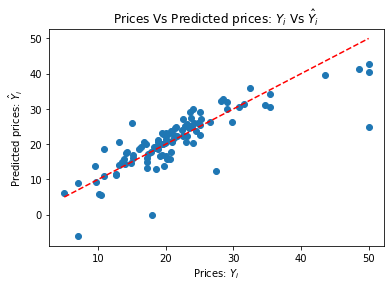

In [26]:
LinReg.fit(X_train,y_train)

y_pred = LinReg.predict(X_test)

plt.scatter(y_test, y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.show()

In [29]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test,y_pred)
print("Mean Square Error : ", mse)
print("Mean Absolute Error : ", mae)
rmsquare = r2_score(y_test,y_pred)
print("Root Mean Square Error : ",rmsquare)

Mean Square Error :  24.291119474973232
Mean Absolute Error :  3.1890919658877905
Root Mean Sqaure Error :  0.6687594935356359


In [30]:
ridgeReg = RidgeCV()


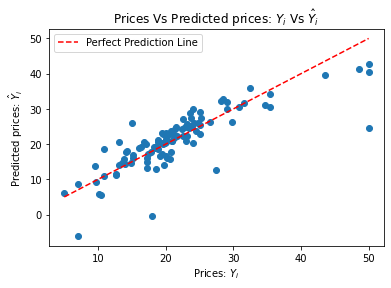

In [36]:
ridgeReg.fit(X_train,y_train)
y_pred = ridgeReg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.legend()
plt.show()

In [37]:
lasoReg = LassoCV()

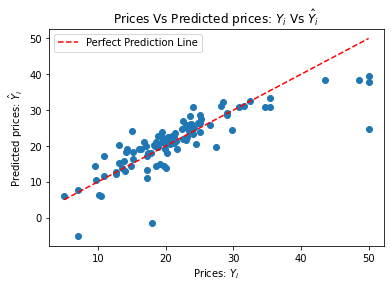

In [44]:
lasoReg.fit(X_train,y_train)
y_pred = lasoReg.predict(X_test)
plt.scatter(y_test,y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.legend()
plt.show()

In [51]:
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)


In [55]:

ols_reg =sm.OLS(y_train,X_train).fit()
y_pred = ols_reg.predict(X_test)

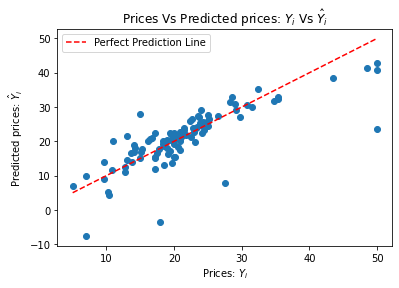

In [56]:
plt.scatter(y_test,y_pred)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{Y}_i$")
plt.title("Prices Vs Predicted prices: $Y_i$ Vs $\hat{Y}_i$")
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.legend()
plt.show()

In [57]:
print("\nOLS Regression Coefficients:\n", ols_reg.params)
print("\nLinear Regression Coefficients:\n", LinReg.coef_)
print("\nRidge Regression Coefficients:\n", ridgeReg.coef_)
print("\nLasso Regression Coefficients:\n", lasoReg.coef_)


OLS Regression Coefficients:
 [-0.10047235  0.03417569  0.033571    2.73965227 -5.15511967  6.19597333
 -0.01108091 -1.020035    0.13881847 -0.00779673 -0.45408744  0.0168434
 -0.42589164]

Linear Regression Coefficients:
 [-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
 -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
  2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
 -5.08571424e-01]

Ridge Regression Coefficients:
 [-1.12399694e-01  3.04593913e-02  3.48958401e-02  2.75033318e+00
 -1.59244585e+01  4.44577949e+00 -7.30474356e-03 -1.42960751e+00
  2.60042840e-01 -1.07802272e-02 -9.00771040e-01  1.24004781e-02
 -5.10902332e-01]

Lasso Regression Coefficients:
 [-0.08608473  0.03078674 -0.          0.         -0.          2.50063757
  0.00620321 -0.80007905  0.2292278  -0.01270353 -0.7204681   0.01186048
 -0.69003449]


In [58]:
y_test

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8, 21.5,
       18.9,  7. , 21.2, 18.5, 29.8, 18.8, 10.2, 50. , 14.1, 25.2, 29.1,
       12.7, 22.4, 14.2, 13.8, 20.3, 14.9, 21.7, 18.3, 23.1, 23.8, 15. ,
       20.8, 19.1, 19.4, 34.7, 19.5, 24.4, 23.4, 19.7, 28.2, 50. , 17.4,
       22.6, 15.1, 13.1, 24.2, 19.9, 24. , 18.9, 35.4, 15.2, 26.5, 43.5,
       21.2, 18.4, 28.5, 23.9, 18.5, 25. , 35.4, 31.5, 20.2, 24.1, 20. ,
       13.1, 24.8, 30.8, 12.7, 20. , 23.7, 10.8, 20.6, 20.8,  5. , 20.1,
       48.5, 10.9,  7. , 20.9, 17.2, 20.9,  9.7, 19.4, 29. , 16.4, 25. ,
       25. , 17.1, 23.2, 10.4, 19.6, 17.2, 27.5, 23. , 50. , 17.9,  9.6,
       17.2, 22.5, 21.4])

In [60]:
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]


In [62]:
for i, (name, y_pred) in enumerate(zip(models, predictions)):
    print(i,name,y_pred)
    print("\n")

0 OLS [28.99672362 36.02556534 14.81694405 25.03197915 18.76987992 23.25442929
 17.66253818 14.34119    23.01320703 20.63245597 24.90850512 18.63883645
 -6.08842184 21.75834668 19.23922576 26.19319733 20.64773313  5.79472718
 40.50033966 17.61289074 27.24909479 30.06625441 11.34179277 24.16077616
 17.86058499 15.83609765 22.78148106 14.57704449 22.43626052 19.19631835
 22.43383455 25.21979081 25.93909562 17.70162434 16.76911711 16.95125411
 31.23340153 20.13246729 23.76579011 24.6322925  13.94204955 32.25576301
 42.67251161 17.32745046 27.27618614 16.99310991 14.07009109 25.90341861
 20.29485982 29.95339638 21.28860173 34.34451856 16.04739105 26.22562412
 39.53939798 22.57950697 18.84531367 32.72531661 25.0673037  12.88628956
 22.68221908 30.48287757 31.52626806 15.90148607 20.22094826 16.71089812
 20.52384893 25.96356264 30.61607978 11.59783023 20.51232627 27.48111878
 11.01962332 15.68096344 23.79316251  6.19929359 21.6039073  41.41377225
 18.76548695  8.87931901 20.83076916 13.25620

In [15]:
X_rm = X[:, [0, 1]]

array([0.02731, 0.     ])

In [19]:
# Import necessary libraries Simple linear Regression with one variable
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Use only the RM feature (average number of rooms per dwelling)
#X_rm = X[:, np.newaxis, 5]  # Reshape for a single feature
X_rm = X[:, [0, 1]]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_rm, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For OLS, add a constant to the feature set
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)



# Initialize and train OLS model from statsmodels
ols_model = sm.OLS(y_train, X_train_scaled_ols).fit()

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_test_scaled_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate MSE and R^2 score for each model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = ols_model.rsquared  # Note: This is for the model fit on training data

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = linear_model.score(X_test_scaled, y_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test_scaled, y_test)

# Print MSE and R^2 score for each model
print(f'OLS Regression MSE: {mse_ols}')
print(f'OLS Regression R^2 Score: {r2_ols}\n')  # Adjusted to reflect actual test performance

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}\n')

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}\n')

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}')


OLS Regression MSE: 47.207372567360274
OLS Regression R^2 Score: 0.20144089223453732

Linear Regression MSE: 47.207372567360274
Linear Regression R^2 Score: 0.3562670500149283

Ridge Regression MSE: 47.23291681975543
Ridge Regression R^2 Score: 0.3559187214370978

Lasso Regression MSE: 47.66775632390412
Lasso Regression R^2 Score: 0.3499891282072213


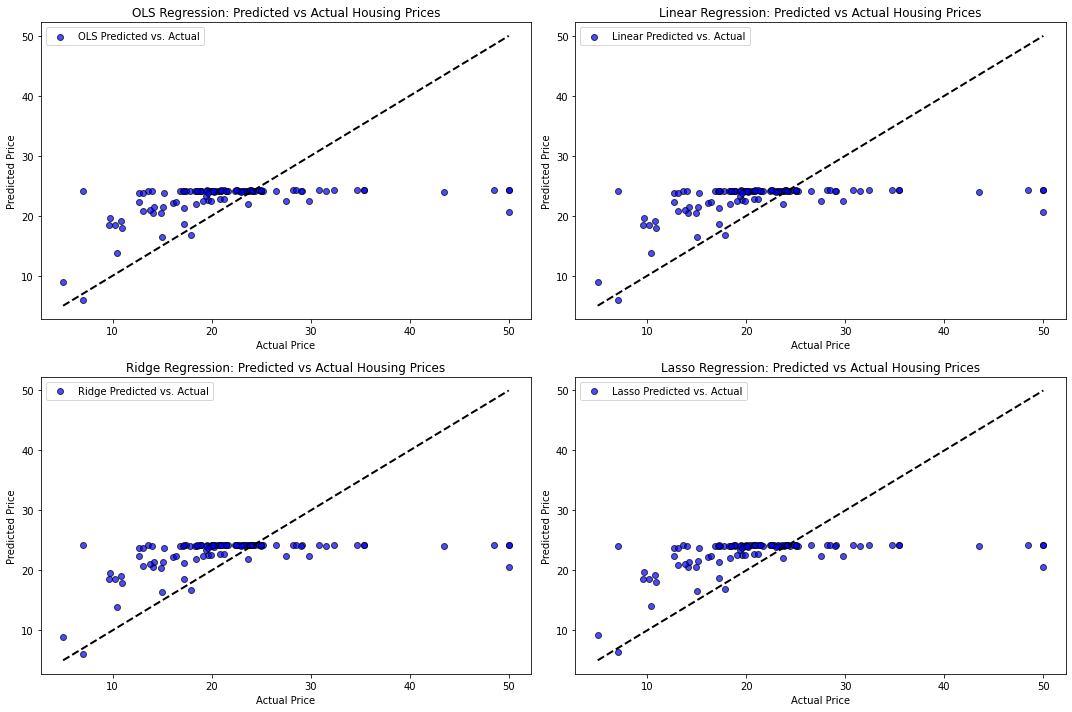

In [20]:
# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()

OLS Regression MSE: 47.207372567360274
OLS Regression R^2 Score: 0.20144089223453732

Linear Regression MSE: 47.207372567360274
Linear Regression R^2 Score: 0.3562670500149283

Ridge Regression MSE: 47.23291681975543
Ridge Regression R^2 Score: 0.3559187214370978

Lasso Regression MSE: 47.66775632390412
Lasso Regression R^2 Score: 0.3499891282072213



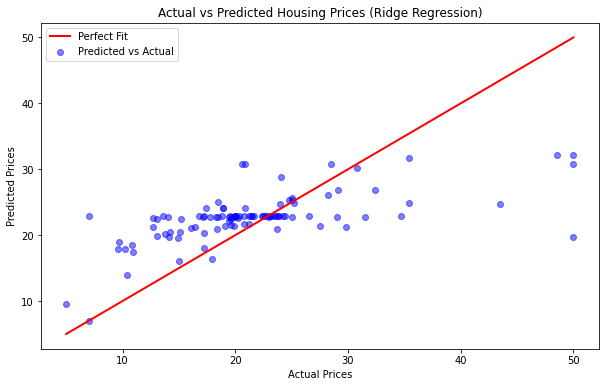

In [21]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Select two features: CRIM (index 0) and ZN (index 1)
X_selected = X[:, [0, 1]]  # Using CRIM and ZN as features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For OLS, add a constant to the feature set
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)

# Initialize and train OLS model from statsmodels
ols_model = sm.OLS(y_train, X_train_scaled_ols).fit()

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_test_scaled_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate MSE and R^2 score for each model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = ols_model.rsquared  # Note: This is for the model fit on training data

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = linear_model.score(X_test_scaled, y_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test_scaled, y_test)

# Print MSE and R^2 score for each model
print(f'OLS Regression MSE: {mse_ols}')
print(f'OLS Regression R^2 Score: {r2_ols}\n')  # Adjusted to reflect actual test performance

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}\n')

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}\n')

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}\n')

# Plot actual vs predicted values for Ridge model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices (Ridge Regression)')
plt.legend()
plt.show()


OLS Regression MSE: 32.286470202898535
OLS Regression R^2 Score: 0.6616473856947815

Linear Regression MSE: 32.28647020289853
Linear Regression R^2 Score: 0.5597326523805056

Ridge Regression MSE: 32.25398275486253
Ridge Regression R^2 Score: 0.5601756603181294

Lasso Regression MSE: 31.982666206354555
Lasso Regression R^2 Score: 0.5638754087398741



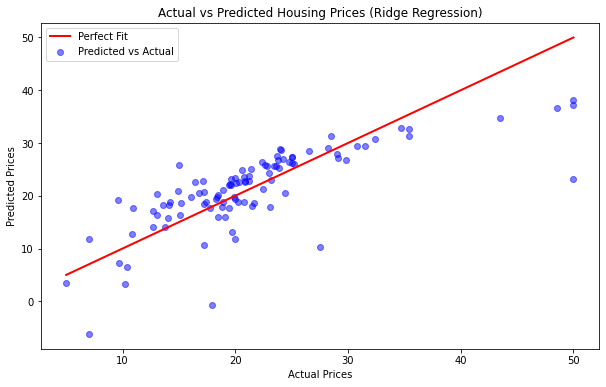

In [23]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Select four features: CRIM (0), ZN (1), RM (5), and LSTAT (12)
X_selected = X[:, [0, 1, 5, 12]]  # Using CRIM, ZN, RM, and LSTAT as features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For OLS, add a constant to the feature set
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)

# Initialize and train OLS model from statsmodels
ols_model = sm.OLS(y_train, X_train_scaled_ols).fit()

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_test_scaled_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate MSE and R^2 score for each model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = ols_model.rsquared  # Note: This is for the model fit on training data

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = linear_model.score(X_test_scaled, y_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test_scaled, y_test)

# Print MSE and R^2 score for each model
print(f'OLS Regression MSE: {mse_ols}')
print(f'OLS Regression R^2 Score: {r2_ols}\n')

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}\n')

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}\n')

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}\n')

# Plot actual vs predicted values for Ridge model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices (Ridge Regression)')
plt.legend()
plt.show()


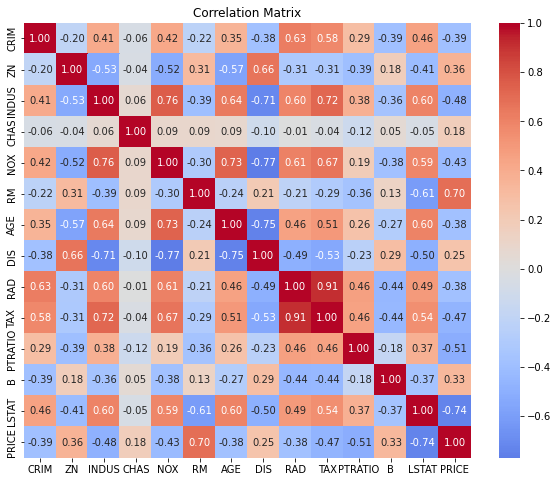

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a DataFrame with the features and target
boston_df = pd.DataFrame(X, columns=load_boston().feature_names)
boston_df['PRICE'] = y

# Compute correlation matrix
correlation_matrix = boston_df.corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


In [28]:
import numpy as np

# Assuming correlation_matrix is your correlation DataFrame
target_corr = correlation_matrix['PRICE']  # Replace 'Price' with your target variable name

# Choose features with high absolute correlation
threshold = 0.5
strong_features = target_corr[abs(target_corr) > threshold]

# Display strong features
print(strong_features)


RM         0.695360
PTRATIO   -0.507787
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64


In [30]:
target_corr = correlation_matrix['PRICE']
target_corr

CRIM      -0.388305
ZN         0.360445
INDUS     -0.483725
CHAS       0.175260
NOX       -0.427321
RM         0.695360
AGE       -0.376955
DIS        0.249929
RAD       -0.381626
TAX       -0.468536
PTRATIO   -0.507787
B          0.333461
LSTAT     -0.737663
PRICE      1.000000
Name: PRICE, dtype: float64

OLS Regression MSE: 31.266136982841672
OLS Regression R^2 Score: 0.6601380855356579

Linear Regression MSE: 31.26613698284165
Linear Regression R^2 Score: 0.5736462018536893

Ridge Regression MSE: 31.242080875949636
Ridge Regression R^2 Score: 0.573974237662771

Lasso Regression MSE: 30.969843585237662
Lasso Regression R^2 Score: 0.5776865415830092



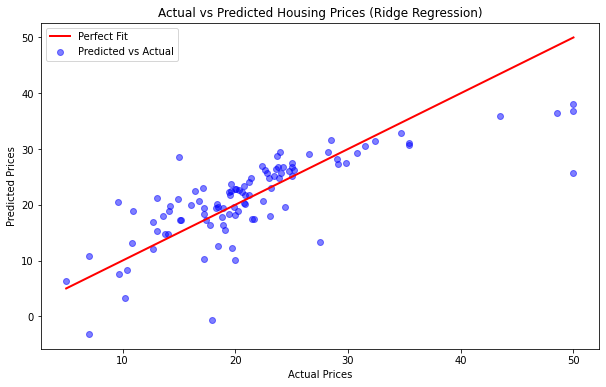

In [31]:
import numpy as np
import statsmodels.api as sm
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load Boston housing dataset
X, y = load_boston(return_X_y=True)

# Select four features: CRIM (0), ZN (1), RM (5), and LSTAT (12)
X_selected = X[:, [5,7, 12]]  # Using CRIM, ZN, RM, and LSTAT as features

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# For OLS, add a constant to the feature set
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)

# Initialize and train OLS model from statsmodels
ols_model = sm.OLS(y_train, X_train_scaled_ols).fit()

# Initialize and train Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train_scaled, y_train)

# Initialize and train Ridge Regression model
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train_scaled, y_train)

# Initialize and train Lasso Regression model
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_test_scaled_ols)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_model.predict(X_test_scaled)
y_pred_lasso = lasso_model.predict(X_test_scaled)

# Calculate MSE and R^2 score for each model
mse_ols = mean_squared_error(y_test, y_pred_ols)
r2_ols = ols_model.rsquared  # Note: This is for the model fit on training data

mse_linear = mean_squared_error(y_test, y_pred_linear)
r2_linear = linear_model.score(X_test_scaled, y_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = ridge_model.score(X_test_scaled, y_test)

mse_lasso = mean_squared_error(y_test, y_pred_lasso)
r2_lasso = lasso_model.score(X_test_scaled, y_test)

# Print MSE and R^2 score for each model
print(f'OLS Regression MSE: {mse_ols}')
print(f'OLS Regression R^2 Score: {r2_ols}\n')

print(f'Linear Regression MSE: {mse_linear}')
print(f'Linear Regression R^2 Score: {r2_linear}\n')

print(f'Ridge Regression MSE: {mse_ridge}')
print(f'Ridge Regression R^2 Score: {r2_ridge}\n')

print(f'Lasso Regression MSE: {mse_lasso}')
print(f'Lasso Regression R^2 Score: {r2_lasso}\n')

# Plot actual vs predicted values for Ridge model
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_ridge, color='blue', label='Predicted vs Actual', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label='Perfect Fit')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Housing Prices (Ridge Regression)')
plt.legend()
plt.show()


In [1]:
#FISH CV

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
import statsmodels as sm

In [8]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [3]:
df.head.to_latex

NameError: name 'df' is not defined

In [70]:
df.shape

(159, 7)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [72]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


In [73]:
df.isna().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

Linear Regression
1. Feature=> Length1, Length2, Length3, Height, Width
2. Output => width

In [47]:
data = {
    'a': [1, 2, 3, 4, 5],
    'b': [5, 4, 3, 2, 1],
    'c': [2, 3, 4, 5, 6],
    'd': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Specify features and target variable
X = df[['a', 'b', 'c']]  # Features
y = df['d']

In [49]:
X

,a,b,c
0,1,5,2
1,2,4,3
2,3,3,4
3,4,2,5
4,5,1,6


In [50]:
y

0    10
1    15
2    20
3    25
4    30
Name: d, dtype: int64

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [52]:
X_train

,a,b,c
4,5,1,6
2,3,3,4
0,1,5,2
3,4,2,5


In [53]:
y_train

4    30
2    20
0    10
3    25
Name: d, dtype: int64

In [54]:
X_test

,a,b,c
1,2,4,3


In [55]:
y_test

1    15
Name: d, dtype: int64

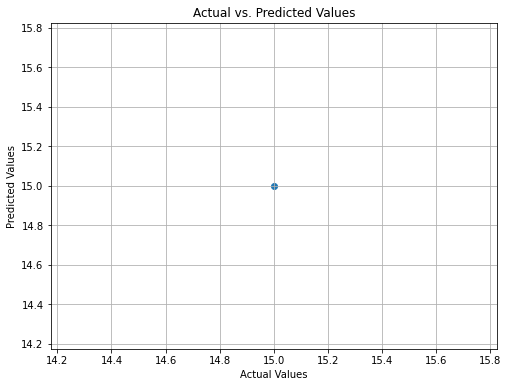

In [63]:
Linreg =LinearRegression()
Linreg.fit(X_train,y_train)
y_pred = Linreg.predict(X_test)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred)  # Plot actual vs. predicted values
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2)  # Diagonal line
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.grid()
plt.show()

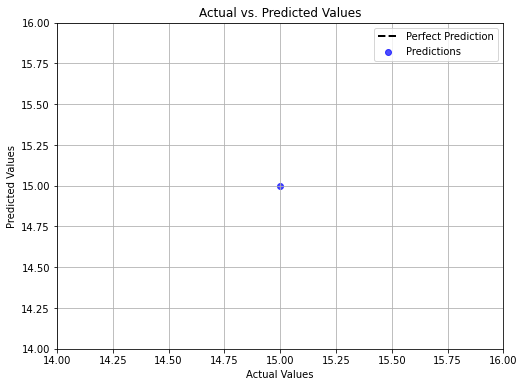

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Sample DataFrame (replace this with your actual DataFrame)
data = {
    'a': [1, 2, 3, 4, 5],
    'b': [5, 4, 3, 2, 1],
    'c': [2, 3, 4, 5, 6],
    'd': [10, 15, 20, 25, 30]
}
df = pd.DataFrame(data)

# Specify features and target variable
X = df[['a', 'b', 'c']]  # Features
y = df['d']               # Target variable

# Split the DataFrame into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, label='Predictions', color='blue', alpha=0.7)  # Scatter plot of actual vs. predicted

# Define the range for the diagonal line
line_range = np.linspace(min(y_test.min(), y_pred.min()), max(y_test.max(), y_pred.max()), 100)

# Plot the diagonal line
plt.plot(line_range, line_range, 'k--', lw=2, label='Perfect Prediction')  # Diagonal line

plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.grid()
plt.xlim(min(y_test.min(), y_pred.min()) - 1, max(y_test.max(), y_pred.max()) + 1)  # Set x-axis limits
plt.ylim(min(y_test.min(), y_pred.min()) - 1, max(y_test.max(), y_pred.max()) + 1)  # Set y-axis limits
plt.show()


In [6]:
df

NameError: name 'df' is not defined

In [75]:
df.Species.value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [21]:
speices_value_counts = df.Species.value_counts()
speices_value_counts = pd.DataFrame(speices_value_counts)
speices_value_counts.T

,Perch,Bream,Roach,Pike,Smelt,Parkki,Whitefish
Species,56,35,20,17,14,11,6


In [19]:
import seaborn as sns


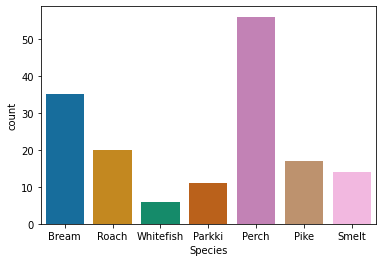

In [25]:
ax = sns.countplot(x="Species", data=df, palette="colorblind")
plt.savefig("C:/Users/Anil Sah/OneDrive/Desktop/fish_species_bar_chart.png")
plt.show()

In [4]:
#BARPLOT

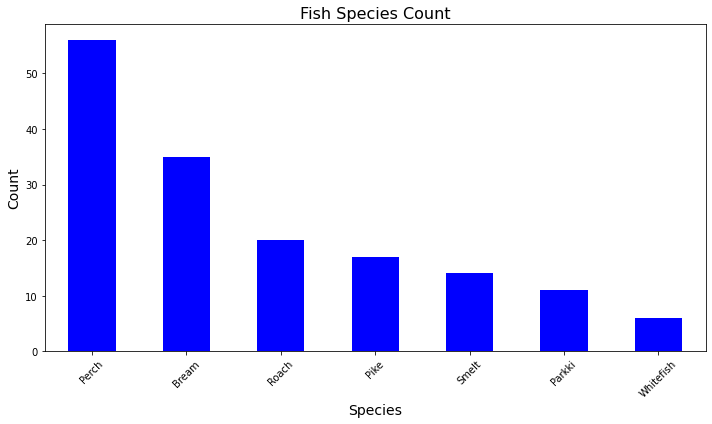

In [12]:
species_counts = df['Species'].value_counts()

# Plot the bar chart
plt.figure(figsize=(10,6))
species_counts.plot(kind='bar', color='blue')

# Add labels and title
plt.title('Fish Species Count', fontsize=16)
plt.xlabel('Species', fontsize=14)
plt.ylabel('Count', fontsize=14)

# Show plot
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

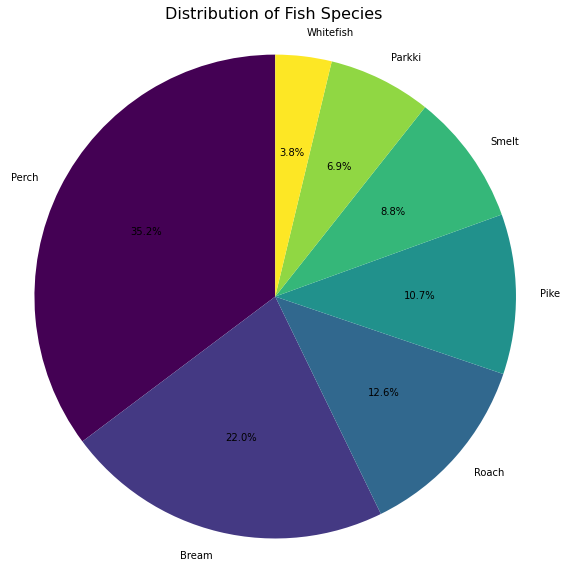

In [17]:
species_counts = df['Species'].value_counts()

# Create a pie chart
plt.figure(figsize=(8,8))
plt.pie(species_counts.values, labels=species_counts.index, autopct='%1.1f%%', 
        colors=plt.cm.viridis(np.linspace(0, 1, len(species_counts))), startangle=90)

# Add a title with padding
plt.title('Distribution of Fish Species', fontsize=16, pad=20)

# Equal aspect ratio ensures the pie chart is circular.
plt.axis('equal')

# Adjust space between the plot and other elements
plt.tight_layout()

#save
plt.savefig("C:/Users/Anil Sah/OneDrive/Desktop/fish_species_pie_chart.png")

# Show the plot
plt.show()


In [26]:
#BOX PLOT

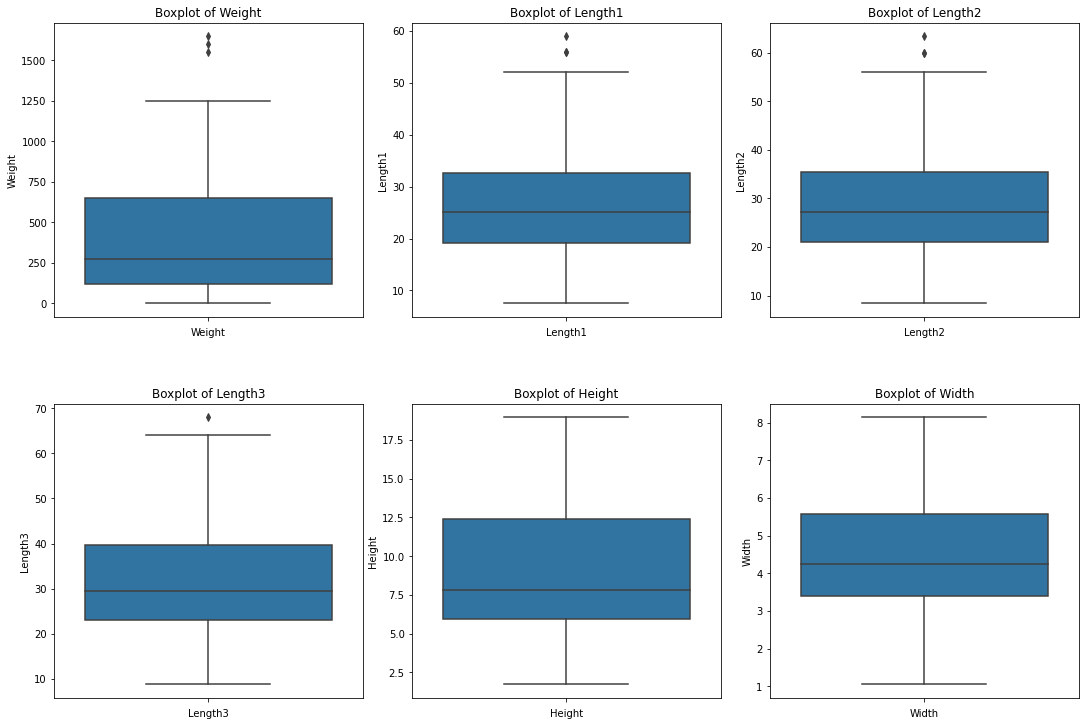

In [30]:
#ALL FEATURES
#boxplot for all features
import math
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
num_columns = len(numeric_columns)

n_cols = math.ceil(math.sqrt(num_columns))  
n_rows = math.ceil(num_columns / n_cols)    
fig, axs = plt.subplots(ncols=n_cols, nrows=n_rows, figsize=(5 * n_cols, 5 * n_rows))
index = 0
axs = axs.flatten()
for index, k in enumerate(numeric_columns):
    sns.boxplot(y=k, data=df, ax=axs[index])
    axs[index].set_title(f'Boxplot of {k}') 
    axs[index].set_xlabel(k)  

for i in range(len(numeric_columns), len(axs)):
    axs[i].set_visible(False)

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.savefig("C:/Users/Anil Sah/OneDrive/Desktop/fish_species_box_chart.png")
plt.show()

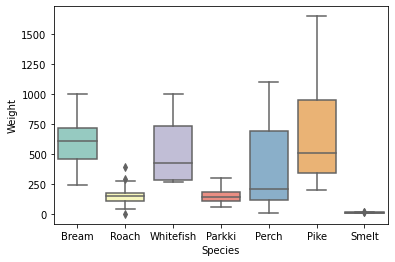

In [31]:
#BOX PLOT FOR SPECIES
ax = sns.boxplot(x="Species", y="Weight",
                 data=df, palette="Set3")
plt.savefig("C:/Users/Anil Sah/OneDrive/Desktop/fish_species_box_species_chart.png")
plt.show()

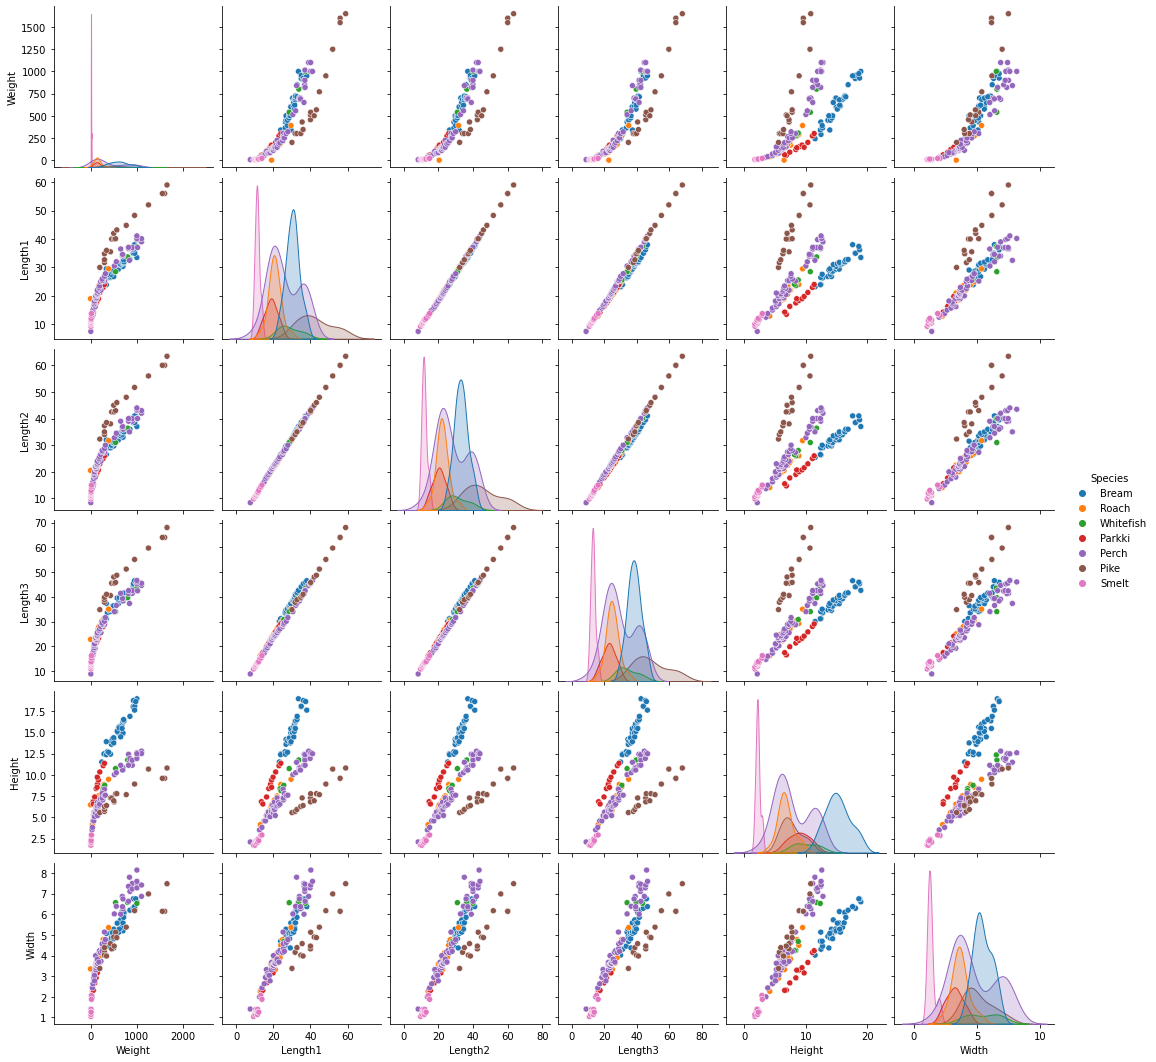

In [32]:
#PAIR PLOT OF SPECIES
g = sns.pairplot(df, kind='scatter', hue='Species');
plt.savefig("C:/Users/Anil Sah/OneDrive/Desktop/fish_species_pair_species_chart.png")
plt.show()

In [91]:
#LINEAR REGRESSION

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score


In [93]:
df.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [101]:
X = df[['Length1', 'Length2', 'Length3', 'Height','Width']]
X

,Length1,Length2,Length3,Height,Width
0,23.2,25.4,30.0,11.5200,4.0200
1,24.0,26.3,31.2,12.4800,4.3056
2,23.9,26.5,31.1,12.3778,4.6961
3,26.3,29.0,33.5,12.7300,4.4555
4,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...
154,11.5,12.2,13.4,2.0904,1.3936
155,11.7,12.4,13.5,2.4300,1.2690
156,12.1,13.0,13.8,2.2770,1.2558
157,13.2,14.3,15.2,2.8728,2.0672


In [102]:
X.shape

(159, 5)

In [103]:
Y = df['Weight']
Y

0      242.0
1      290.0
2      340.0
3      363.0
4      430.0
       ...  
154     12.2
155     13.4
156     12.2
157     19.7
158     19.9
Name: Weight, Length: 159, dtype: float64

In [104]:
Y.shape

(159,)

In [99]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [100]:
X_train

,Length1,Length2,Length3,Height,Width
75,15.0,16.2,17.2,4.5924,2.6316
138,43.2,46.0,48.7,7.7920,4.8700
2,23.9,26.5,31.1,12.3778,4.6961
86,20.0,22.0,23.5,6.1100,3.4075
45,20.5,22.5,25.3,7.0334,3.8203
...,...,...,...,...,...
71,24.0,26.0,29.0,11.3680,4.2340
106,25.9,28.0,29.4,7.8204,4.2042
14,29.4,32.0,37.2,14.9544,5.1708
92,20.5,22.5,24.0,6.7920,3.6240


In [105]:
X_train.shape

(127, 5)

In [106]:
y_train

75      51.5
138    567.0
2      340.0
86     120.0
45     160.0
       ...  
71     300.0
106    250.0
14     600.0
92     150.0
102    300.0
Name: Weight, Length: 127, dtype: float64

In [107]:
y_train.shape

(127,)

In [108]:
X_test

,Length1,Length2,Length3,Height,Width
78,16.8,18.7,19.4,5.1992,3.1234
155,11.7,12.4,13.5,2.4300,1.2690
128,30.0,32.3,34.8,5.5680,3.3756
55,23.6,26.0,28.7,8.3804,4.2476
94,21.0,23.0,24.5,5.2185,3.6260
29,33.5,37.0,42.6,18.9570,6.6030
147,10.1,10.6,11.6,1.7284,1.1484
51,23.6,25.2,27.9,7.0866,3.9060
98,22.6,24.6,26.2,6.7334,4.1658
141,52.0,56.0,59.7,10.6863,6.9849


In [109]:
X_test.shape

(32, 5)

In [110]:
y_test

78       78.0
155      13.4
128     200.0
55      270.0
94      150.0
29     1000.0
147       7.0
51      180.0
98      188.0
141    1250.0
19      650.0
60     1000.0
15      600.0
65      150.0
24      700.0
30      920.0
126    1000.0
101     218.0
96      225.0
16      700.0
151      10.0
18      610.0
12      500.0
9       500.0
31      955.0
125    1100.0
95      170.0
56      270.0
145       6.7
152       9.9
135     510.0
76       70.0
Name: Weight, dtype: float64

In [111]:
y_test.shape

(32,)

Without feature scaling

In [146]:
linear_model = LinearRegression().fit(X_train,y_train)

In [147]:
y_pred = linear_model.predict(X_test)

In [148]:
print(f"Linear Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872


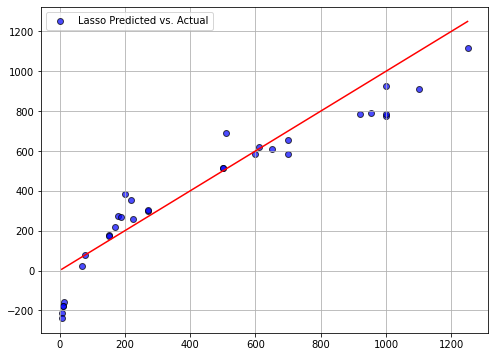

In [149]:
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='red')
plt.legend()
plt.grid(True)

In [150]:
print('coef= ', linear_model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', linear_model.intercept_)
print('score= ', linear_model.score(X_test,y_test))

coef=  [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]
intercept=  -515.305651338433
score=  0.8821430593048695


Linear Regression R^2 score: 0.8803
Linear Regression MSE: 17022.0223
coef=  [ 27.03858344  17.69642626 -19.51672787  20.3581969   27.51531904]
intercept=  -518.4376329756694
score=  0.8803282646977368


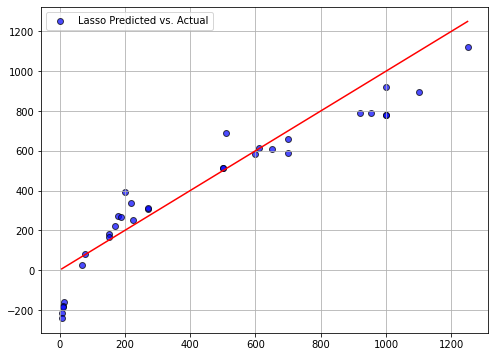

In [158]:
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train,y_train)
y_pred_ridge = ridge_model.predict(X_test)
print(f"Linear Regression R^2 score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_ridge,color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='red')
plt.legend()
plt.grid(True)
print('coef= ', ridge_model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', ridge_model.intercept_)
print('score= ', ridge_model.score(X_test,y_test))

With feature scaling

In [124]:
scaler = StandardScaler()

In [160]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [138]:
X_train

,Length1,Length2,Length3,Height,Width
75,15.0,16.2,17.2,4.5924,2.6316
138,43.2,46.0,48.7,7.7920,4.8700
2,23.9,26.5,31.1,12.3778,4.6961
86,20.0,22.0,23.5,6.1100,3.4075
45,20.5,22.5,25.3,7.0334,3.8203
...,...,...,...,...,...
71,24.0,26.0,29.0,11.3680,4.2340
106,25.9,28.0,29.4,7.8204,4.2042
14,29.4,32.0,37.2,14.9544,5.1708
92,20.5,22.5,24.0,6.7920,3.6240


In [139]:
X_train_scaled

array([[-1.13082956, -1.14878727, -1.22092909, -1.06273398, -1.10441696],
       [ 1.70924967,  1.65907911,  1.53608537, -0.25944123,  0.27042307],
       [-0.2344925 , -0.17828312, -0.00434176,  0.89187139,  0.16361254],
       [-0.62726941, -0.60228979, -0.6695262 , -0.68172477, -0.62785406],
       [-0.5769134 , -0.55517794, -0.51198251, -0.44989563, -0.37430959],
       [-0.68769663, -0.69651349, -0.65202134, -0.68056989, -0.69738225],
       [-0.64741182, -0.64940164, -0.61701164,  0.22872054, -0.78165139],
       [ 1.04455028,  0.99951318,  0.88840579,  0.90530312,  1.7945153 ],
       [ 0.58127494,  0.62261837,  0.8271388 ,  1.89209588,  1.01975511],
       [ 1.58839524,  1.56485541,  1.47481839, -0.46832346,  0.28639244],
       [-1.63438971, -1.68586239, -1.71106499, -1.72061256, -2.00828337],
       [-0.62726941, -0.60228979, -0.6695262 , -0.82922273, -0.26700769],
       [-0.72798144, -0.7247806 , -0.69578348, -0.07225063, -0.69732083],
       [-0.97976152, -0.96033987, -0.9

In [134]:
X_train_scaled.shape

(127, 5)

In [136]:
X_train_scaled[75][0]

0.13814201208715365

In [141]:
X_test_scaled

array([[-9.42304682e-01, -8.95531458e-01, -9.99582757e-01,
        -8.32077895e-01, -6.64921354e-01],
       [-1.44701136e+00, -1.47068005e+00, -1.48560188e+00,
        -1.36181445e+00, -1.65488460e+00],
       [ 3.63994949e-01,  3.46059146e-01,  2.69009524e-01,
        -7.61527975e-01, -5.30285499e-01],
       [-2.69362448e-01, -2.29089443e-01, -2.33484821e-01,
        -2.23527442e-01, -6.47721517e-02],
       [-5.26663890e-01, -5.02969723e-01, -5.79464534e-01,
        -8.28385885e-01, -3.96610565e-01],
       [ 7.10362276e-01,  7.75138252e-01,  9.11543276e-01,
         1.79973256e+00,  1.19264773e+00],
       [-1.60535071e+00, -1.63500822e+00, -1.64211651e+00,
        -1.49602764e+00, -1.71926638e+00],
       [-2.69362448e-01, -3.02124184e-01, -2.99385719e-01,
        -4.71026052e-01, -2.47133802e-01],
       [-3.68324541e-01, -3.56900240e-01, -4.39425126e-01,
        -5.38591756e-01, -1.08440720e-01],
       [ 2.54116100e+00,  2.50971336e+00,  2.32017496e+00,
         2.17581727e-01

In [142]:
print(X_test.shape)
print(X_test_scaled.shape)

(32, 5)
(32, 5)


Linear Regression R^2 score: 0.8640
Linear Regression MSE: 19341.2795


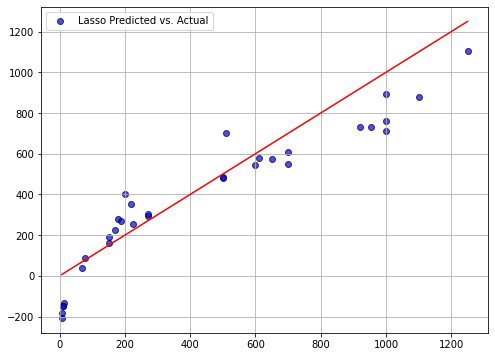

In [143]:
linear_model = LinearRegression().fit(X_train_scaled,y_train)
y_pred = linear_model.predict(X_test_scaled)
print(f"Linear Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred,color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='red')
plt.legend()
plt.grid(True)

In [162]:
print('coef= ', linear_model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', linear_model.intercept_)
print('score= ', linear_model.score(X_test_scaled,y_test))

coef=  [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]
intercept=  -515.305651338433
score=  -6.147503653346308


In [163]:
#LASSO AND RIDGE
from sklearn.linear_model import RidgeCV,LassoCV

Linear Regression R^2 score: 0.8635
Linear Regression MSE: 19422.4681
coef=  [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]
intercept=  386.7944881889764
score=  0.8634521549959158


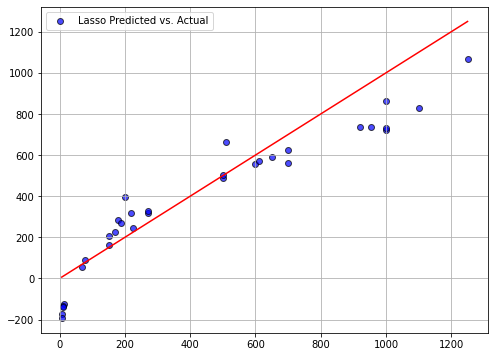

In [171]:
ridge_model = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled,y_train)
y_pred_ridge = ridge_model.predict(X_test_scaled)
print(f"Linear Regression R^2 score: {r2_score(y_test, y_pred_ridge):.4f}")
print(f"Linear Regression MSE: {mean_squared_error(y_test, y_pred_ridge):.4f}")
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_ridge,color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='red')
plt.legend()
plt.grid(True)
print('coef= ', ridge_model.coef_) # Since we have two features(Height and Width), there will be 2 coef
print('intercept= ', ridge_model.intercept_)
print('score= ', ridge_model.score(X_test_scaled,y_test))

Lasso Regression R^2 score: 0.8647
Lasso Regression MSE: 19247.5389


C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 108774.44488280755, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 59630.785899722716, tolerance: 1182.2963117029706
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 5593.203733987641, tolerance: 1267.629976754902
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.

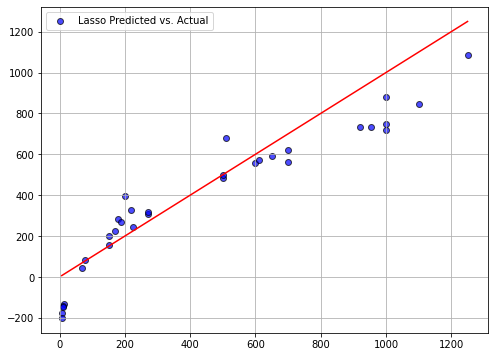

In [173]:
#lasso
lasso_model = LassoCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled,y_train)
y_pred_lasso = lasso_model.predict(X_test_scaled)
print(f"Lasso Regression R^2 score: {r2_score(y_test, y_pred_lasso):.4f}")
print(f"Lasso Regression MSE: {mean_squared_error(y_test, y_pred_lasso):.4f}")
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_lasso,color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='red')
plt.legend()
plt.grid(True)
plt.show()



In [174]:
#ols

In [175]:
import statsmodels.api as sm

In [176]:
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)

In [177]:
ols_model = sm.OLS(y_train, X_ols_train).fit()

In [178]:
y_pred_ols = ols_model.predict(X_ols_test)

Lasso Regression R^2 score: 0.8821
Lasso Regression MSE: 16763.8872


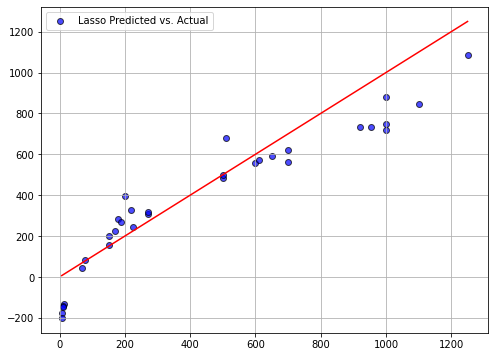

In [179]:
print(f"Lasso Regression R^2 score: {r2_score(y_test, y_pred_ols):.4f}")
print(f"Lasso Regression MSE: {mean_squared_error(y_test, y_pred_ols):.4f}")
plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_lasso,color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],c='red')
plt.legend()
plt.grid(True)
plt.show()


In [180]:
#SUMMING UP ALL IN ONE CODE

In [33]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm


In [34]:
df = pd.read_csv("Fish.csv")
df

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [35]:
X = df[['Length1', 'Length2', 'Length3', 'Height','Width']]
Y= df['Weight']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1479.5199890816584, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 124837.64166346879, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 480905.75497209746, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descen

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8803
Ridge Regression MSE: 17022.0223
Lasso Regression R^2 score: 0.8774
Lasso Regression MSE: 17431.9637

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]

Ridge Regression Coefficients:
 [ 27.03858344  17.69642626 -19.51672787  20.3581969   27.51531904]

Lasso Regression Coefficients:
 [24.91762755  0.1063255  -0.         13.44083754 29.06666741]


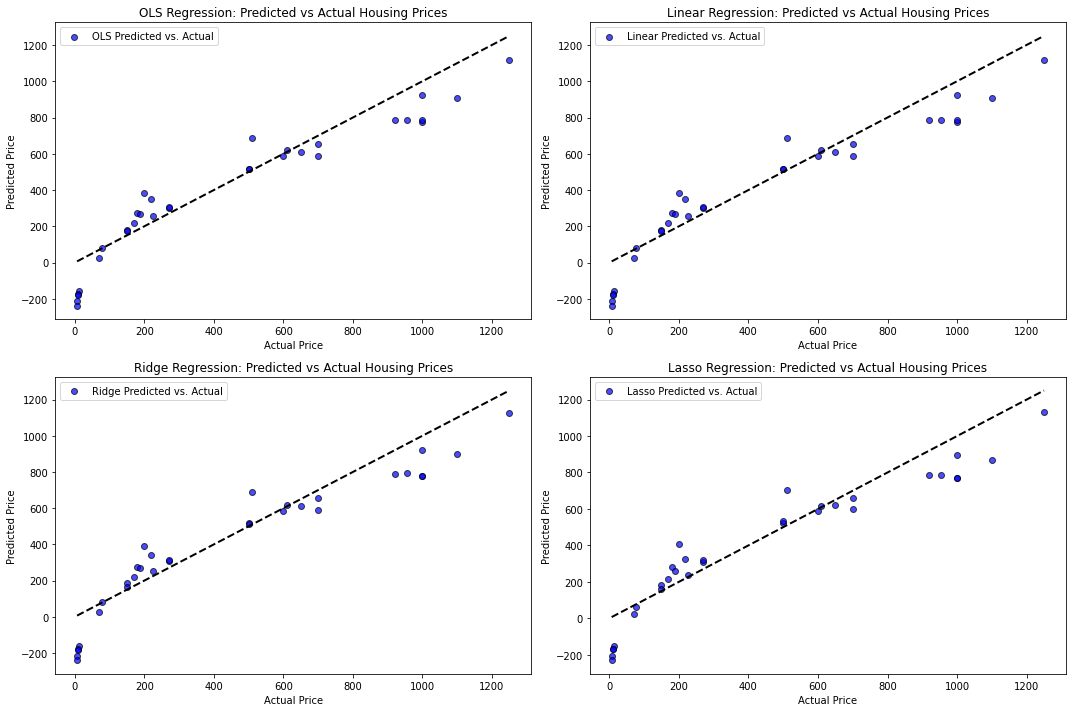

In [38]:
# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: -6.1303
Ridge Regression MSE: 1014214.4655
Lasso Regression R^2 score: -6.1464
Lasso Regression MSE: 1016494.2173

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 43.5352649    7.82179624 -25.25670105  23.2289123   27.06649294]

Ridge Regression Coefficients:
 [ 27.03858344  17.69642626 -19.51672787  20.3581969   27.51531904]

Lasso Regression Coefficients:
 [24.91762755  0.1063255  -0.         13.44083754 29.06666741]


In [193]:
#scaling

C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 109155.20239408454, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 491218.1014314948, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:528: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 732567.1345518022, tolerance: 1307.1945102178217
  tol, rng, random, positive)
C:\Users\Anil Sah\miniconda3\envs\myenv\lib\site-packages\sklearn\linear_model\_coordinate_descent.

OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8770
Ridge Regression MSE: 17488.5753
Lasso Regression R^2 score: 0.8773
Lasso Regression MSE: 17458.6532

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 432.27472554   83.01304108 -288.56797575   92.52321581   44.06740907]

Ridge Regression Coefficients:
 [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]

Lasso Regression Coefficients:
 [229.96344143   0.           0.          44.01533366  75.78051359]


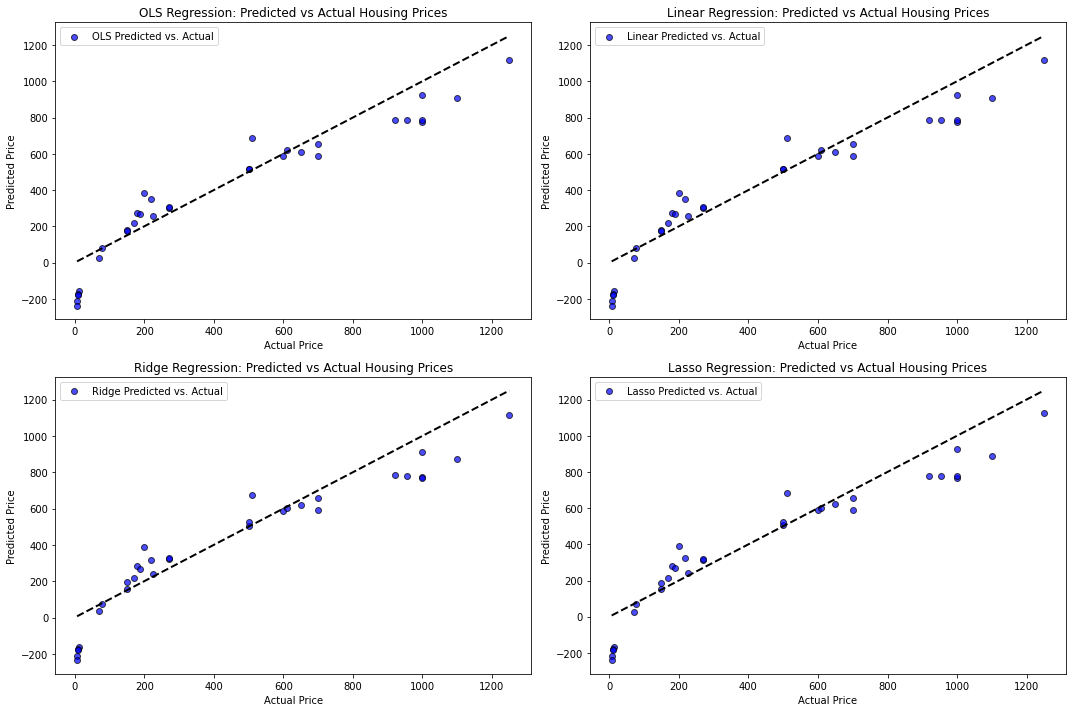

In [194]:
# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

results = []
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")
    results.append((name, r2, mse))

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


OLS Regression R^2 score: 0.8821
OLS Regression MSE: 16763.8872
Linear Regression R^2 score: 0.8821
Linear Regression MSE: 16763.8872
Ridge Regression R^2 score: 0.8770
Ridge Regression MSE: 17488.5753
Lasso Regression R^2 score: 0.8773
Lasso Regression MSE: 17458.6532

OLS Regression Coefficients:
 const     -515.305651
Length1     43.535265
Length2      7.821796
Length3    -25.256701
Height      23.228912
Width       27.066493
dtype: float64

Linear Regression Coefficients:
 [ 432.27472554   83.01304108 -288.56797575   92.52321581   44.06740907]

Ridge Regression Coefficients:
 [83.29023683 80.60503657 64.91737168 35.7986499  77.01514167]

Lasso Regression Coefficients:
 [229.96344143   0.           0.          44.01533366  75.78051359]

---------------------------
OLS Regression R^2 score: 0.8821 OLS Regression MSE: 16763.8872 Linear Regression R^2 score: 0.8821 Linear Regression MSE: 16763.8872 Ridge Regression R^2 score: -6.1303 Ridge Regression MSE: 1014214.4655 Lasso Regression R^2 score: -6.1464 Lasso Regression MSE: 1016494.2173

OLS Regression Coefficients: const -515.305651 Length1 43.535265 Length2 7.821796 Length3 -25.256701 Height 23.228912 Width 27.066493 dtype: float64

Linear Regression Coefficients: [ 43.5352649 7.82179624 -25.25670105 23.2289123 27.06649294]

Ridge Regression Coefficients: [ 27.03858344 17.69642626 -19.51672787 20.3581969 27.51531904]

Lasso Regression Coefficients: [24.91762755 0.1063255 -0. 13.44083754 29.06666741]

In [205]:
df.shape

(159, 7)

In [206]:
df[df.Weight <= 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


In [208]:
df1=df.drop([40])

In [209]:
df1

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340
...,...,...,...,...,...,...,...
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672


In [211]:
df1.shape

(158, 7)

In [212]:
df1.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915719,0.918603,0.923090,0.723857,0.886654
Length1,0.915719,1.000000,0.999516,0.992004,0.624409,0.866684
Length2,0.918603,0.999516,1.000000,0.994083,0.639503,0.873201
Length3,0.923090,0.992004,0.994083,1.000000,0.702655,0.878189
Height,0.723857,0.624409,0.639503,0.702655,1.000000,0.792401
Width,0.886654,0.866684,0.873201,0.878189,0.792401,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

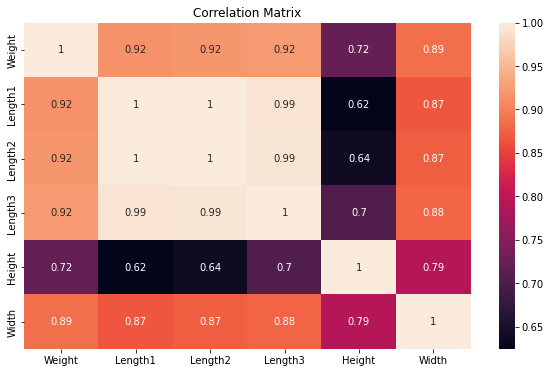

In [214]:
plt.rcParams["figure.figsize"] = (10,6) # Custom figure size in inches
sns.heatmap(df1.corr(), annot =True)
plt.title('Correlation Matrix')

In [250]:
df_mat =df.corr()
#sel=df.loc[df_mat["Weight"].abs()>0.9,["Weight"]]
#df.loc[df_mat['Width']>0.9,['Weight']]


In [249]:
#since, l1,l2,l3,are almost 1 so lets drop as it may cause multicollinearity leading to wrong prediction

In [217]:
df2 = df1.drop(['Length1','Length2','Length3'],axis=1)

In [218]:
df2.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [220]:
df2.shape

(158, 4)

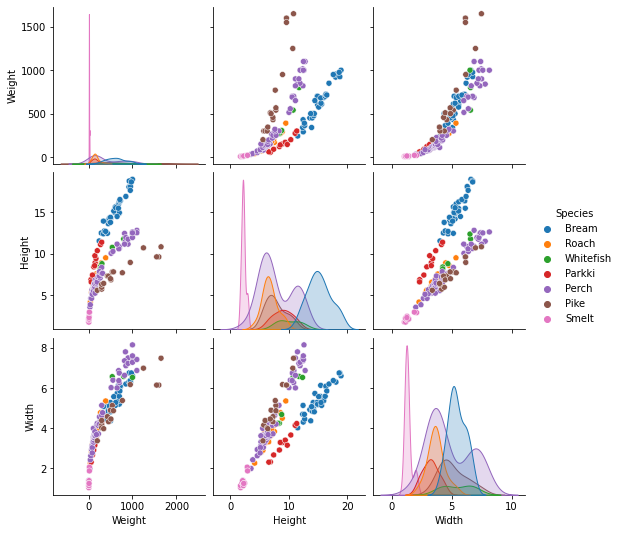

In [221]:
sns.pairplot(df2, kind = 'scatter', hue = 'Species')

From the above pair plot, we can see that there seems to be some correlations between Height, Width and the Weight. Note that since we have multiple species the correlation between Height and Width of all species is not exactly linear with Weight.

Now, since we have the final dataset ready lets analyze and remove the outliers if any

without outier removal

In [224]:
X=df2[['Height','Width']]

In [225]:
Y=df2['Weight']

In [227]:
#without scaling
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

OLS Regression R^2 score: 0.8354
OLS Regression MSE: 22101.9257
Linear Regression R^2 score: 0.8354
Linear Regression MSE: 22101.9257
Ridge Regression R^2 score: 0.8357
Ridge Regression MSE: 22054.0863
Lasso Regression R^2 score: 0.8354
Lasso Regression MSE: 22094.2415

OLS Regression Coefficients:
 const    -428.021022
Height      2.220208
Width     181.152635
dtype: float64

Linear Regression Coefficients:
 [  2.22020754 181.15263525]

Ridge Regression Coefficients:
 [  2.66235085 179.78786025]

Lasso Regression Coefficients:
 [  2.3844803  180.47760191]


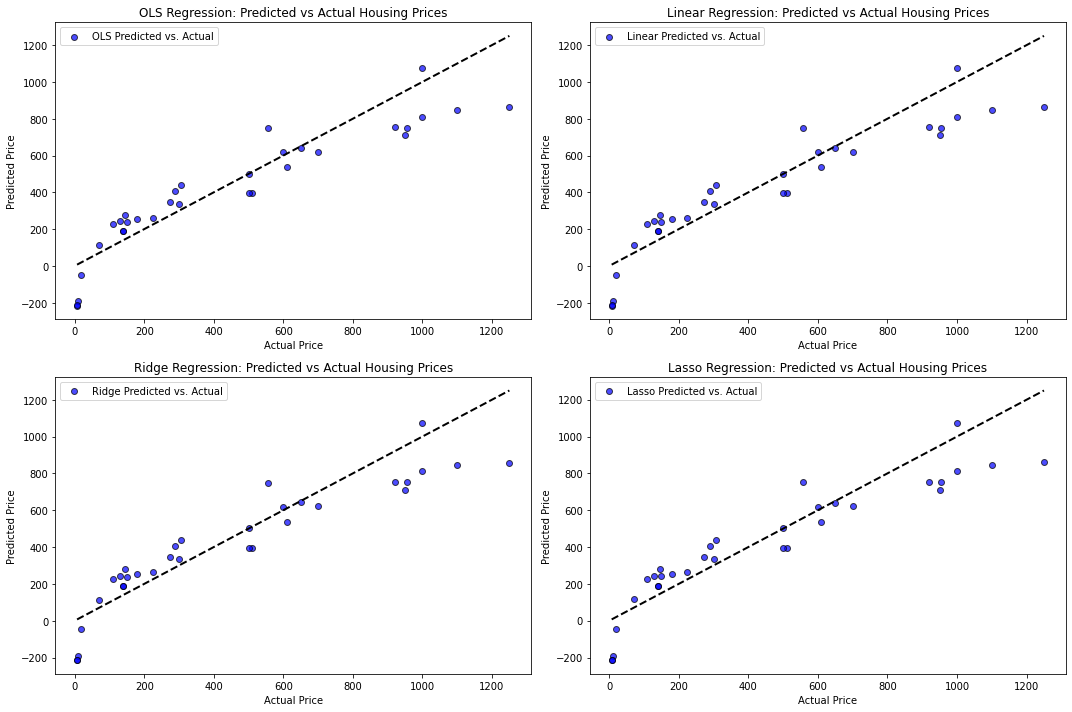

In [228]:

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [229]:
#scaling


OLS Regression R^2 score: 0.8354
OLS Regression MSE: 22101.9257
Linear Regression R^2 score: 0.8354
Linear Regression MSE: 22101.9257
Ridge Regression R^2 score: 0.8362
Ridge Regression MSE: 21990.3693
Lasso Regression R^2 score: 0.8297
Lasso Regression MSE: 22864.4240

OLS Regression Coefficients:
 const    -428.021022
Height      2.220208
Width     181.152635
dtype: float64

Linear Regression Coefficients:
 [  9.057527   302.98008443]

Ridge Regression Coefficients:
 [ 13.78346578 296.87864452]

Lasso Regression Coefficients:
 [  3.51290217 297.37414529]


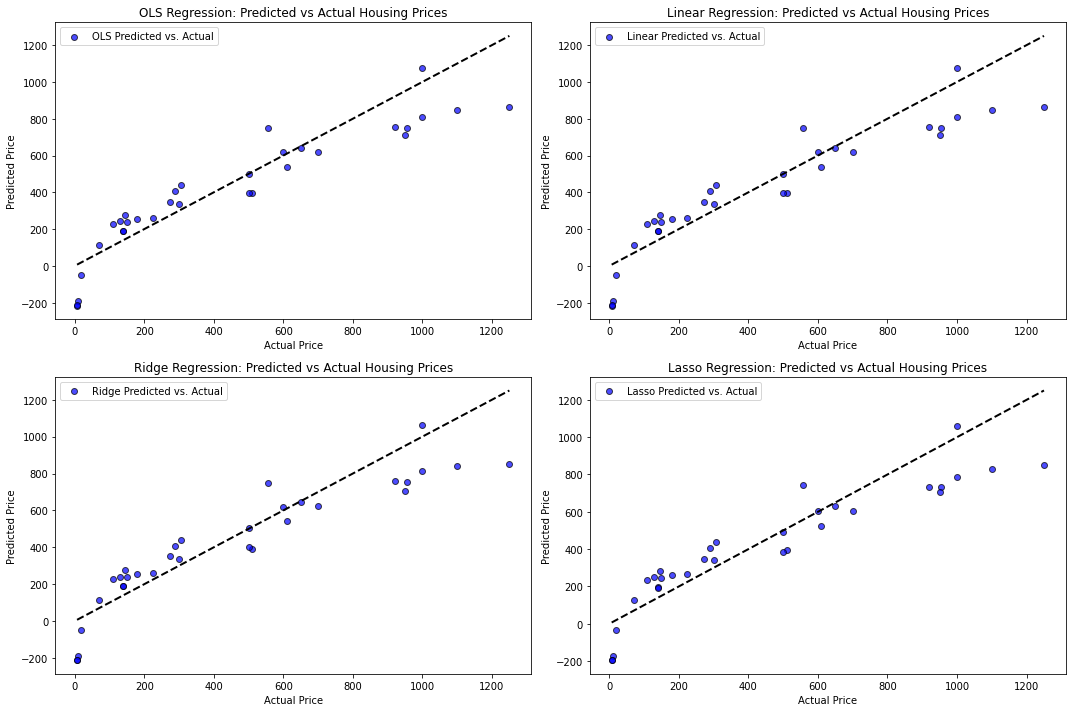

In [230]:
# Feature scaling for sklearn models
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train_scaled, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train_scaled, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train_scaled, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test_scaled)
y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

results = []
for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")
    results.append((name, r2, mse))

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [231]:
#Lets check outlier

In [256]:
def outlier_det(dataframe):
    Q1 = dataframe.quantile(0.25)
    Q3 = dataframe.quantile(0.75)
    IQR = Q3-Q1
    upper_end = Q3 + 1.5* IQR
    lower_end = Q1 - 1.5 * IQR
    
    outlier = dataframe[(dataframe > upper_end) | (dataframe < lower_end)]
    return outlier

In [259]:
outlier_det(df2['Weight'])

142    1600.0
143    1550.0
144    1650.0
Name: Weight, dtype: float64

In [260]:
df2.head()

,Species,Weight,Height,Width
0,Bream,242.0,11.5200,4.0200
1,Bream,290.0,12.4800,4.3056
2,Bream,340.0,12.3778,4.6961
3,Bream,363.0,12.7300,4.4555
4,Bream,430.0,12.4440,5.1340


In [261]:
outlier_det(df2['Height'])

Series([], Name: Height, dtype: float64)

Only outlier in weight,lets remove

In [263]:
#Lets also see outlier in boxplots

Text(0.5, 1.0, 'Outlier Detection based on Width')

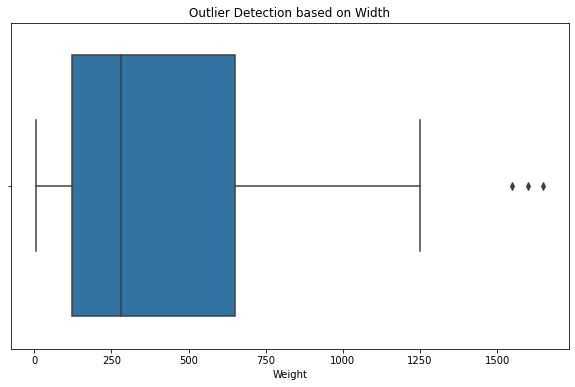

In [264]:
sns.boxplot(x=df2['Weight'])
plt.title('Outlier Detection based on Width')

Some outliers

Text(0.5, 1.0, 'Outlier Detection based on Height')

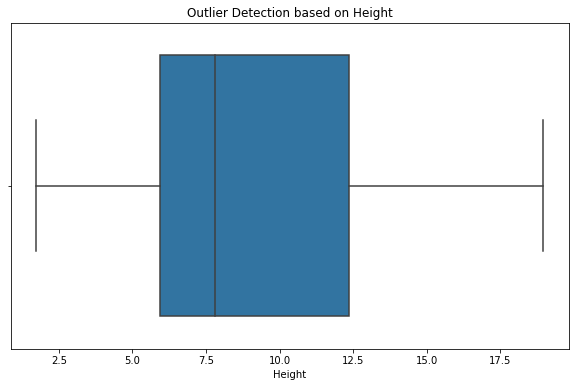

In [265]:
sns.boxplot(x=df2['Height'])
plt.title('Outlier Detection based on Height')

No outliers

In [266]:
df2.shape

(158, 4)

In [267]:
df3 = df2.drop([142,143,144])
df3.shape

(155, 4)

In [270]:
df3.describe()

,Weight,Height,Width
count,155.000000,155.000000,155.000000
mean,377.638065,8.967102,4.382326
std,319.144511,4.333722,1.675564
min,5.900000,1.728400,1.047600
25%,120.000000,5.926950,3.385650
50%,272.000000,7.680000,4.247600
75%,615.000000,12.379300,5.472750
max,1250.000000,18.957000,8.142000


In [272]:
X = df3[['Height', 'Width']]
X.head()

,Height,Width
0,11.5200,4.0200
1,12.4800,4.3056
2,12.3778,4.6961
3,12.7300,4.4555
4,12.4440,5.1340


In [274]:
Y = df3['Weight']
Y.head()

0    242.0
1    290.0
2    340.0
3    363.0
4    430.0
Name: Weight, dtype: float64

In [275]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)

In [276]:
X_train.shape

(124, 2)

In [277]:
X_test.shape

(31, 2)

In [278]:
y_train.shape

(124,)

In [279]:
y_test.shape

(31,)

OLS Regression R^2 score: 0.8960
OLS Regression MSE: 11620.6036
Linear Regression R^2 score: 0.8960
Linear Regression MSE: 11620.6036
Ridge Regression R^2 score: 0.8963
Ridge Regression MSE: 11587.9887
Lasso Regression R^2 score: 0.8960
Lasso Regression MSE: 11620.5445

OLS Regression Coefficients:
 const    -386.167614
Height     10.406861
Width     151.732100
dtype: float64

Linear Regression Coefficients:
 [ 10.40686081 151.73209963]

Ridge Regression Coefficients:
 [ 10.78660582 150.54638625]

Lasso Regression Coefficients:
 [ 10.40734875 151.73077597]


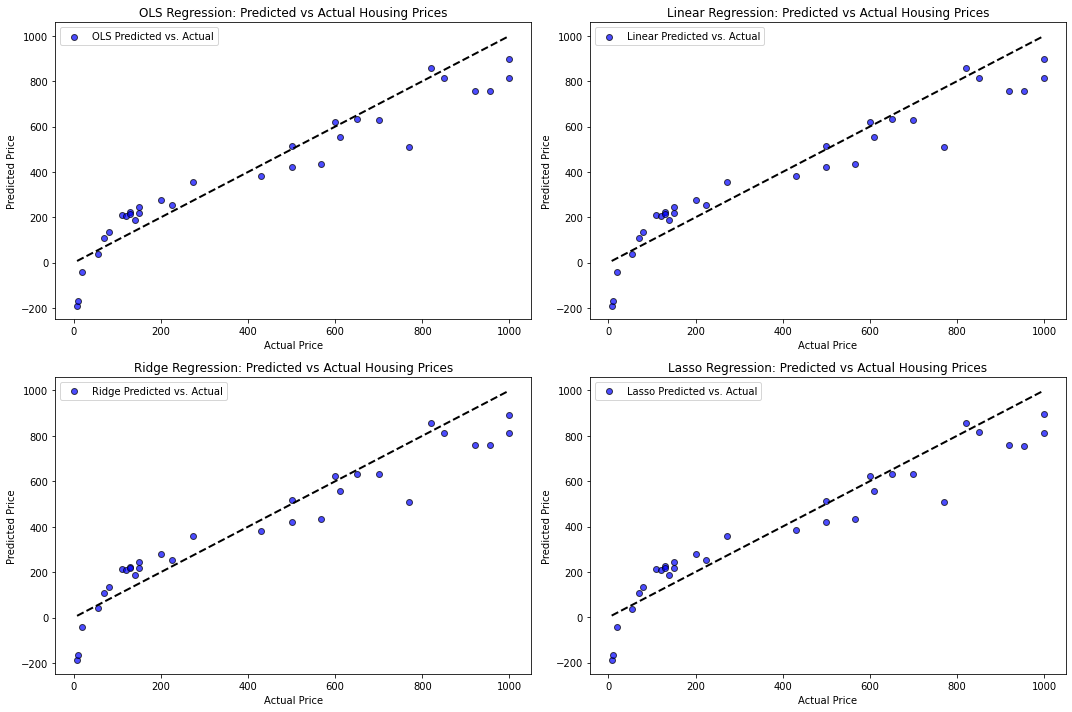

In [280]:
# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [281]:
#scaled

OLS Regression R^2 score: 0.8960
OLS Regression MSE: 11620.6036
Linear Regression R^2 score: 0.8960
Linear Regression MSE: 11620.6036
Ridge Regression R^2 score: 0.8963
Ridge Regression MSE: 11587.9887
Lasso Regression R^2 score: 0.8960
Lasso Regression MSE: 11620.5445

OLS Regression Coefficients:
 const    -386.167614
Height     10.406861
Width     151.732100
dtype: float64

Linear Regression Coefficients:
 [ 10.40686081 151.73209963]

Ridge Regression Coefficients:
 [ 10.78660582 150.54638625]

Lasso Regression Coefficients:
 [ 10.40734875 151.73077597]


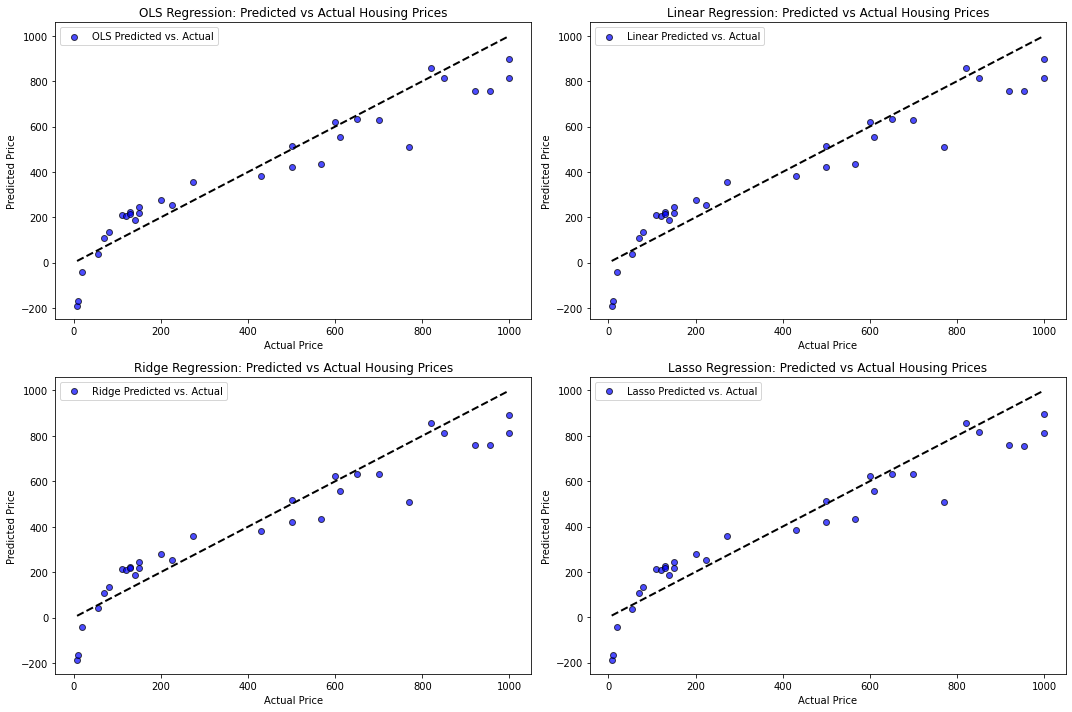

In [282]:

# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


Simple Linear Regression

In [298]:
X=df3['Height'].values.reshape(-1,1)
Y=df3['Weight']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


OLS Regression R^2 score: 0.7205
OLS Regression MSE: 31238.4491
Linear Regression R^2 score: 0.7205
Linear Regression MSE: 31238.4491
Ridge Regression R^2 score: 0.7208
Ridge Regression MSE: 31208.6382
Lasso Regression R^2 score: 0.7205
Lasso Regression MSE: 31238.4425

OLS Regression Coefficients:
 const   -155.768931
x1        59.652495
dtype: float64

Linear Regression Coefficients:
 [59.65249487]

Ridge Regression Coefficients:
 [59.37255019]

Lasso Regression Coefficients:
 [59.6524364]


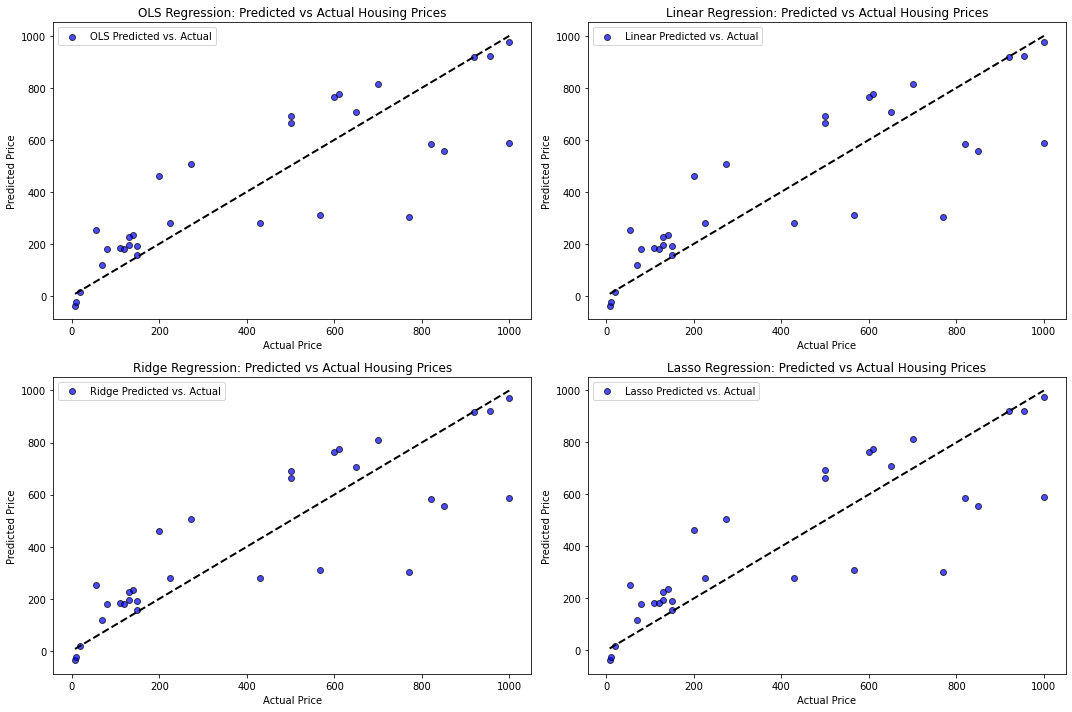

In [299]:
# Add a constant to the feature set for OLS regression
X_ols_train = sm.add_constant(X_train)
X_ols_test = sm.add_constant(X_test)


# Initialize and train models
ols_model = sm.OLS(y_train, X_ols_train).fit()
linear_model = LinearRegression().fit(X_train, y_train)
ridge_cv = RidgeCV(alphas=[0.1, 1.0, 10.0, 100.0]).fit(X_train, y_train)
lasso_cv = LassoCV(alphas=[0.001, 0.01, 0.1, 1.0, 10.0]).fit(X_train, y_train)

# Predict with the models
y_pred_ols = ols_model.predict(X_ols_test)
y_pred_linear = linear_model.predict(X_test)
y_pred_ridge = ridge_cv.predict(X_test)
y_pred_lasso = lasso_cv.predict(X_test)

# Calculate and display R^2 score and MSE for each model
models = ['OLS', 'Linear', 'Ridge', 'Lasso']
predictions = [y_pred_ols, y_pred_linear, y_pred_ridge, y_pred_lasso]

for name, y_pred in zip(models, predictions):
    print(f"{name} Regression R^2 score: {r2_score(y_test, y_pred):.4f}")
    print(f"{name} Regression MSE: {mean_squared_error(y_test, y_pred):.4f}")

# Print coefficients for each model
print("\nOLS Regression Coefficients:\n", ols_model.params)
print("\nLinear Regression Coefficients:\n", linear_model.coef_)
print("\nRidge Regression Coefficients:\n", ridge_cv.coef_)
print("\nLasso Regression Coefficients:\n", lasso_cv.coef_)

# Plotting Actual vs Predicted prices for all models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
axs = axs.flatten()

for i, (name, y_pred) in enumerate(zip(models, predictions)):
    axs[i].scatter(y_test, y_pred, color='blue', edgecolor='k', alpha=0.7, label=f'{name} Predicted vs. Actual')
    axs[i].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
    axs[i].set_xlabel('Actual Price')
    axs[i].set_ylabel('Predicted Price')
    axs[i].set_title(f'{name} Regression: Predicted vs Actual Housing Prices')
    axs[i].legend()

plt.tight_layout()
plt.show()


In [296]:
X=df3['Width'].values.reshape(-1,1)

In [297]:
Y=df3['Weight']
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=42)


array([[11.52  ],
       [12.48  ],
       [12.3778],
       [12.73  ],
       [12.444 ],
       [13.6024],
       [14.1795],
       [12.67  ],
       [14.0049],
       [14.2266],
       [14.2628],
       [14.3714],
       [13.7592],
       [13.9129],
       [14.9544],
       [15.438 ],
       [14.8604],
       [14.938 ],
       [15.633 ],
       [14.4738],
       [15.1285],
       [15.9936],
       [15.5227],
       [15.4686],
       [16.2405],
       [16.36  ],
       [16.3618],
       [16.517 ],
       [16.8896],
       [18.957 ],
       [18.0369],
       [18.084 ],
       [18.7542],
       [18.6354],
       [17.6235],
       [ 4.1472],
       [ 5.2983],
       [ 5.5756],
       [ 5.6166],
       [ 6.216 ],
       [ 6.1677],
       [ 6.1146],
       [ 5.8045],
       [ 6.6339],
       [ 7.0334],
       [ 6.55  ],
       [ 6.4   ],
       [ 7.5344],
       [ 6.9153],
       [ 7.3968],
       [ 7.0866],
       [ 8.8768],
       [ 8.568 ],
       [ 9.485 ],
       [ 8.3804],
       [ 8